> # Fashion Image Classifier #

we will make a fashion image classifier using keras sequential API. The data has 10 classes, 28X28 size.

In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings ; warnings.filterwarnings("ignore")

In [6]:
keras.__version__

'2.4.0'

In [7]:
fasion_data = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fasion_data.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


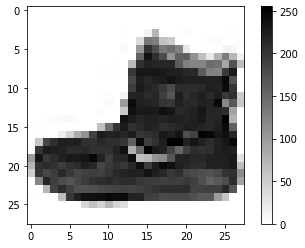

In [20]:
plt.imshow(X_train[0], cmap=plt.cm.binary)
plt.colorbar()

Because there is no validation data, we make it from train set. And since neural network learns using gradient descent, we have to adjust scale of input data.

In [21]:
X_trian_scd, X_valid = (X_train[5000:] / 255.0) , (X_train[:5000] / 255.0)
y_train_scd, y_valid = y_train[5000:] , y_train[:5000]
X_test_scd = X_test / 255.0

Store name of each class(0,1,...,9) in class_names.

In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [25]:
class_names[y_train_scd[0]]

'Coat'

We are ready to make neural network. Let's make a simple model which has two hidden layers.

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

Flatten layer transforms input image to 1D type. This layer doesn't have any parameter. What we have to do is just set input shape. Then next two layer are hidden layers. Dense layer is manage each weight matrix. And set relu activation fuction. In last output layer, since we make classification model, we use softmax active function.

In [28]:
## We can write above code as follows.
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In general, dense layer has lots of parameters. This means the model has sufficient flexibility. It also means danger of overfitting. We can print list of layers and choose a layer easily.

In [31]:
model.layers

In [32]:
hidden1 = model.layers[1]
hidden1.name

'dense_4'

We can approach to all parameter and bias in a layer.

In [36]:
weights, bias = hidden1.get_weights()
weights

array([[ 0.01113517,  0.03101417,  0.02807551, ..., -0.04642961,
         0.00234392, -0.02778301],
       [ 0.02427381, -0.05783881, -0.06348977, ..., -0.02844341,
        -0.00353803, -0.02801729],
       [ 0.01189806, -0.03813341,  0.01980773, ...,  0.00605288,
        -0.00937115, -0.02872688],
       ...,
       [ 0.06437182, -0.04433516,  0.06669033, ...,  0.0554125 ,
        -0.03499977,  0.01663809],
       [ 0.03159916,  0.01658857,  0.02546304, ...,  0.03123207,
        -0.03204389,  0.03075787],
       [-0.05602173, -0.03189759, -0.00453452, ..., -0.06778806,
        -0.04089015,  0.04374011]], dtype=float32)

In [38]:
bias.shape

(300,)

After making model, we should set loss function and optimizer using compile method.

In [39]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])

Since classes are exclusive, use 'sparse_categorical_crossentropy'. If each sample has target probability for class, use 'categorical_crossentropy'. And in binary classificaiton, use 'binary_crossentropy'.

To train the model, just call fit method.

In [40]:
history = model.fit(X_trian_scd, y_train_scd, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.6951 - accuracy: 0.7722 - val_loss: 0.5069 - val_accuracy: 0.8310
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4867 - accuracy: 0.8295 - val_loss: 0.4407 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4449 - accuracy: 0.8432 - val_loss: 0.4131 - val_accuracy: 0.8598
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4178 - accuracy: 0.8525 - val_loss: 0.4033 - val_accuracy: 0.8594
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3965 - accuracy: 0.8595 - val_loss: 0.3785 - val_accuracy: 0.8710
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3818 - accuracy: 0.8639 - val_loss: 0.3680 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3671 - accuracy: 0.8702 - val_loss: 0.3918 - val_accuracy:

If ratio of classes is unbalnced, it's better to set **class_weight** variable. This method gives less weight to more frequently appear class. If we want to give weight to each sample, set **sample_weight** vairable. 

History object involves train parameter(**history.params**) and epoch list(**history.epochs**). And there is a dictionary(**history.history**) that involves loss about validation set and score. We can draw learning curve using these objects.

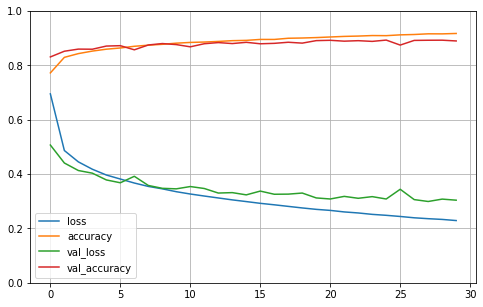

In [45]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.ylim(0,1); plt.grid(True)

If score of model is not satisfying, we should control hyperparameter. What we have to check first is learning rate. And next number of layers, neurons, active function can be considerations.

Then if we get satisfying performance, we have to evaluate the model with test set.

In [46]:
model.evaluate(X_test_scd, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8771


[0.3375868797302246, 0.8770999908447266]

We can predict about new sample.

In [54]:
X_new = X_test[:3]
y_prob = model.predict(X_new)
y_prob

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [64]:
y_pred_class = np.array(class_names)[y_pred]
y_pred_class

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

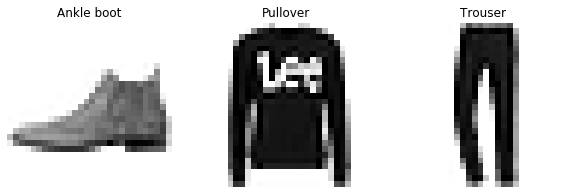

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(10,8))
for i, ax in zip((0,1,2), (ax1, ax2, ax3)):
    ax.imshow(X_new[i], cmap=plt.cm.binary)
    ax.axis(False)
    ax.set_title(y_pred_class[i])